# Scaling Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as wg

from env import get_connection

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer

## 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [2]:
zil = wg.wrangle_zillow(True)
zil.head()

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,Los Angeles County
6,3,4.0,1620.0,847770.0,2011,10244.94,Los Angeles County
7,3,2.0,2077.0,646760.0,1926,7924.68,Los Angeles County
11,0,0.0,1200.0,5328.0,1972,91.60,Los Angeles County
14,0,0.0,171.0,6920.0,1973,255.17,Los Angeles County


In [3]:
train, val, test = wg.train_val_test(zil)

train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [4]:
def compare_data(scaled_col='none', df = train, original = 'price'):
    
    plt.figure(figsize=(13, 8))

    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(122)
    sns.histplot(data=df, x=scaled_col, bins=10)

    plt.show()

In [5]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'price', 'year_built', 'tax_amount',
       'fips'],
      dtype='object')

In [6]:
scaled_cols = ['sq_ft', 'price', 'tax_amount']

mms = MinMaxScaler()
train_mms = train.copy()
mms.fit(train[scaled_cols])
train_mms[['sq_ft_mms', 'price_mms', 'tax_amount_mms']] = mms.transform(train[scaled_cols])

ss = StandardScaler()
train_ss = train.copy()
ss.fit(train[scaled_cols])
train_ss[['sq_ft_ss', 'price_ss', 'tax_amount_ss']] = ss.transform(train[scaled_cols])

rs = RobustScaler()
train_rs = train.copy()
rs.fit(train[scaled_cols])
train_rs[['sq_ft_rs', 'price_rs', 'tax_amount_rs']] = rs.transform(train[scaled_cols])

In [7]:
train_mms.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_mms,price_mms,tax_amount_mms
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.002236,0.003887,0.004366
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.002187,0.004713,0.005921
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.002477,0.004219,0.004454


In [8]:
len(train_mms[train_mms.price < 2_000_000])/len(train_mms)

0.9818684736784491

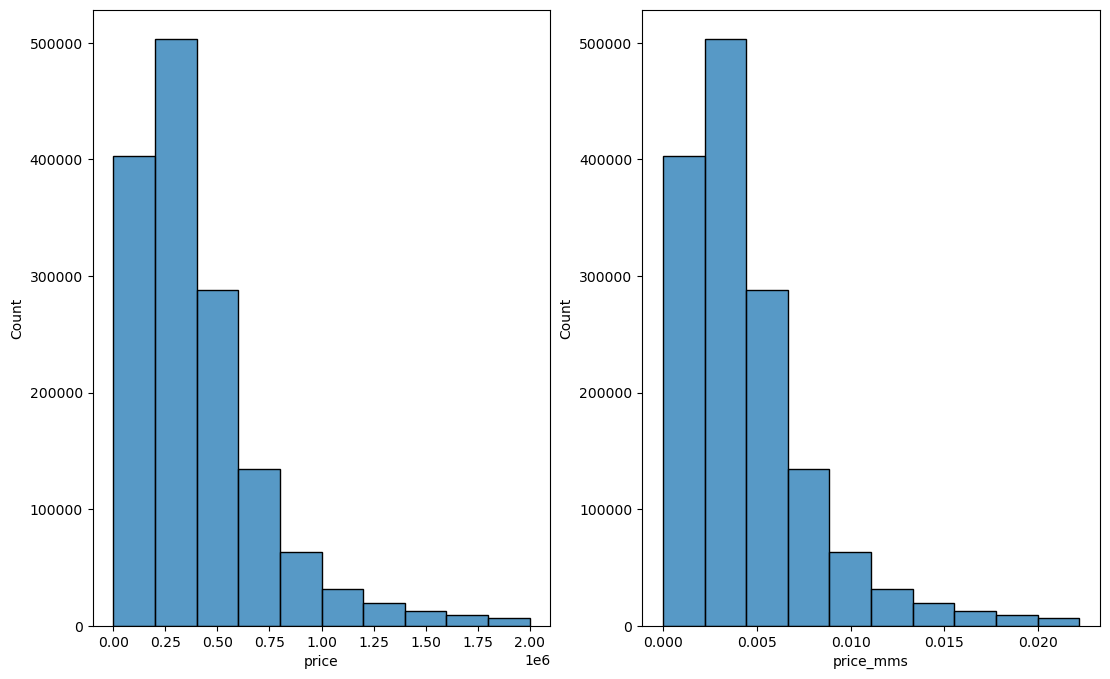

In [9]:
compare_data('price_mms', df = train_mms[train_mms.price < 2_000_000])

In [10]:
train_ss.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_ss,price_ss,tax_amount_ss
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.203144,-0.162678,-0.114411
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.167455,-0.051948,0.101098
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.377795,-0.118116,-0.102140


In [11]:
len(train_mms[train_mms.sq_ft < 5_000])/len(train_mms)

0.9873712090265151

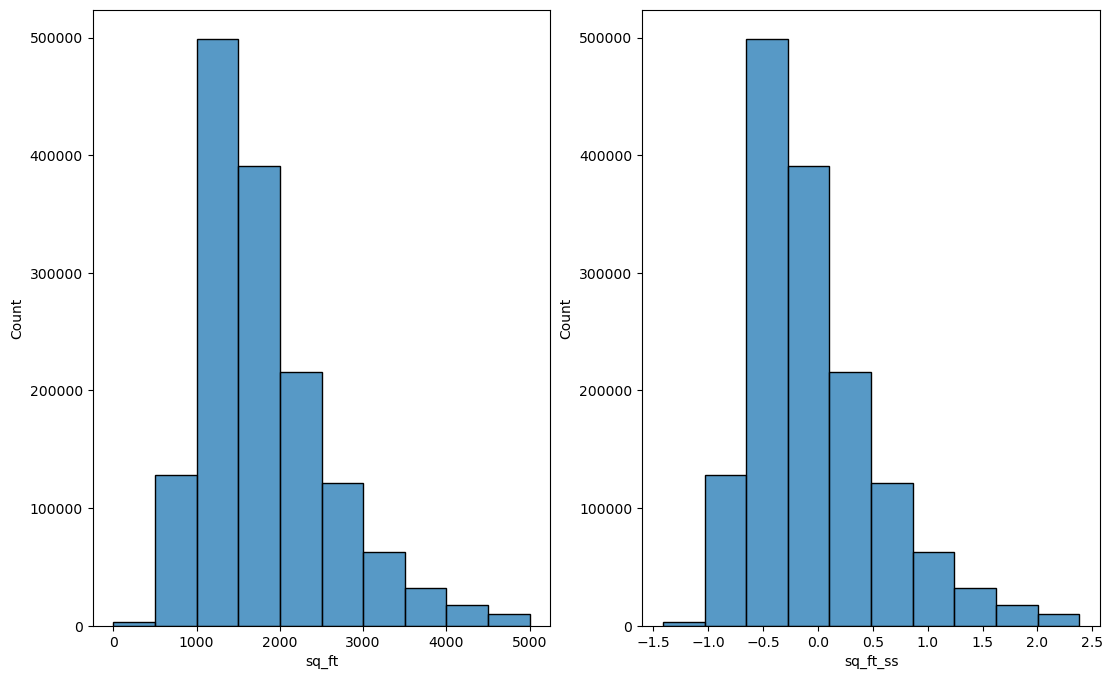

In [12]:
compare_data('sq_ft_ss', original ='sq_ft', df = train_ss[train_ss.sq_ft < 5_000])

In [13]:
train_rs.head(3)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips,sq_ft_rs,price_rs,tax_amount_rs
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County,0.533684,0.063658,0.156881
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County,0.484211,0.279481,0.590101
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County,0.775789,0.150513,0.181549


In [14]:
len(train_mms[train_mms.tax_amount < 25_000])/len(train_mms)

0.9842747522968113

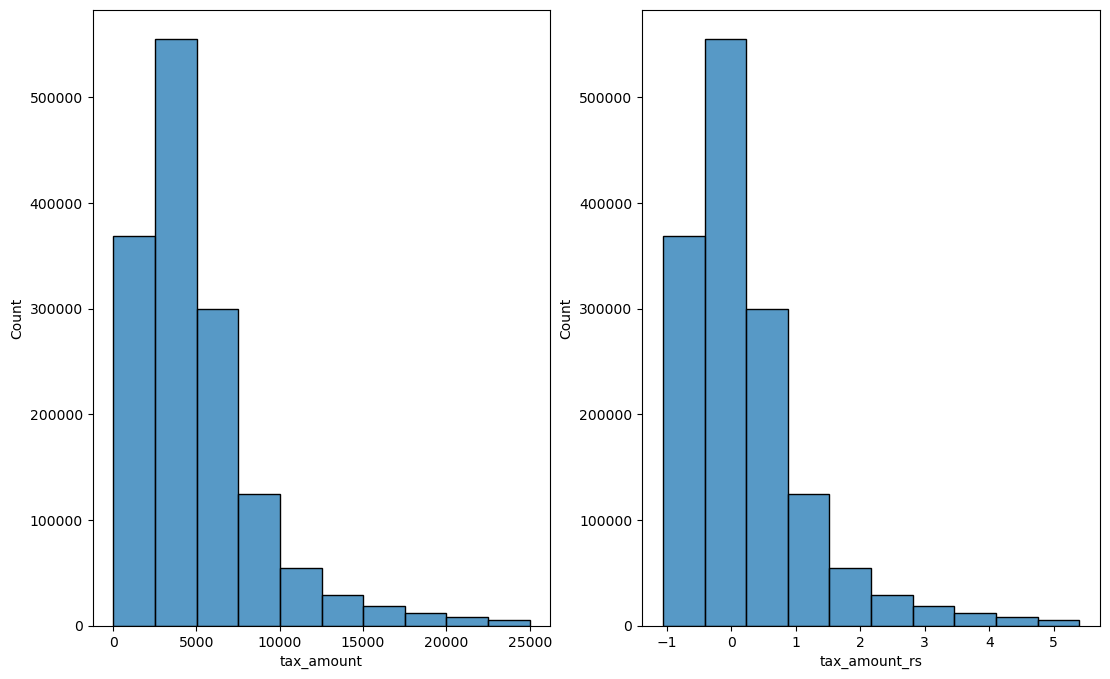

In [15]:
compare_data('tax_amount_rs', original ='tax_amount', df = train_rs[train_ss.tax_amount < 25_000])

## 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [16]:
og_data = mms.inverse_transform(train_mms[['sq_ft_mms', 'price_mms', 'tax_amount_mms']])
pd.DataFrame(og_data).head()

,0,1,2
0,2131.0,350540.0,4719.83
1,2084.0,425101.0,6397.19
2,2361.0,380546.0,4815.34
3,2289.0,293831.0,3559.74
4,2901.0,470040.0,5509.28


In [17]:
train.head()

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County
2093580,5,3.0,2289.0,293831.0,1969,3559.74,Los Angeles County
1677414,5,3.0,2901.0,470040.0,1994,5509.28,Orange County


## 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

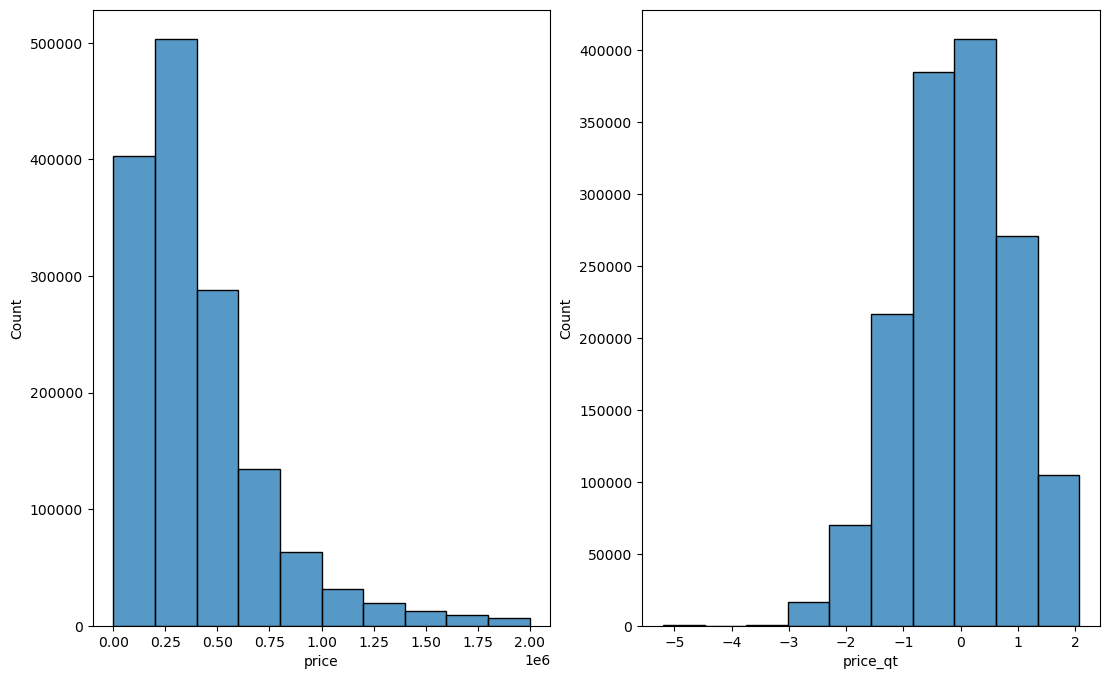

In [18]:
qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')
train_qt = train.copy()
train_qt[['sq_ft_qt', 'price_qt', 'tax_amount_qt']] = qt.fit_transform(train[scaled_cols])
compare_data('price_qt', df = train_qt[train_qt.price < 2_000_000])

## 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

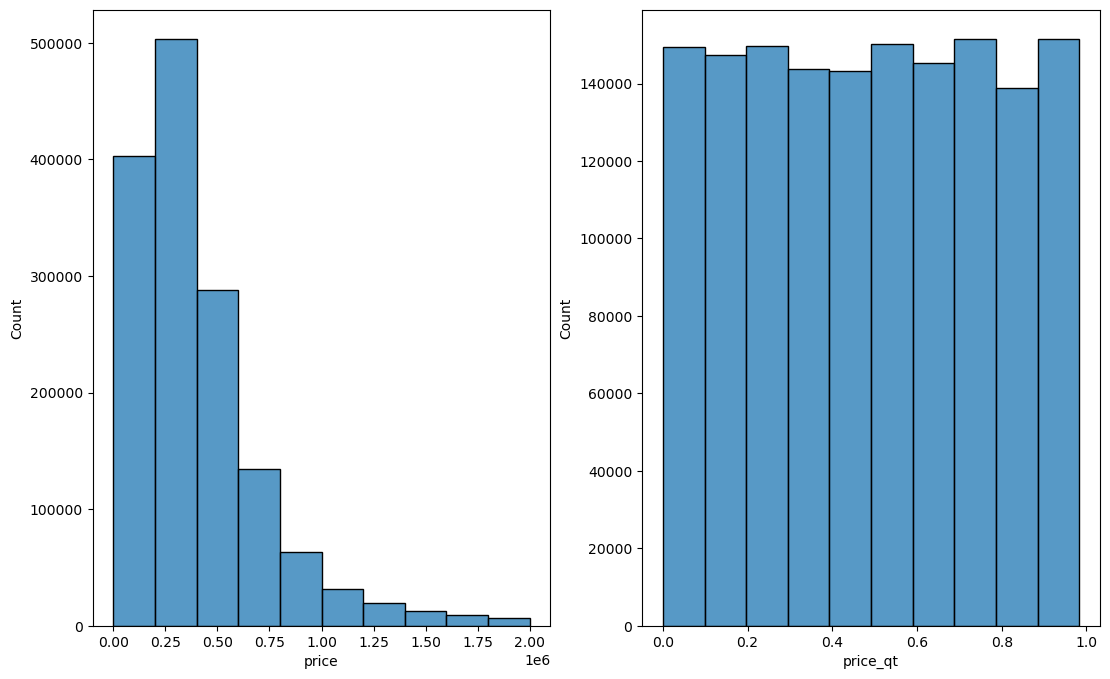

In [19]:
qt = QuantileTransformer(n_quantiles=100)
train_qt = train.copy()
train_qt[['sq_ft_qt', 'price_qt', 'tax_amount_qt']] = qt.fit_transform(train[scaled_cols])
compare_data('price_qt', df = train_qt[train_qt.price < 2_000_000])

## 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [20]:
zil = wg.wrangle_zillow()
train, val, test = wg.scale_zillow(zil)
train.price

1816338    0.003887
1770176    0.004713
1033606    0.004219
2093580    0.003258
1677414    0.005212
             ...   
214216     0.006377
66028      0.001660
212054     0.000463
1111128    0.003559
1884462    0.006889
Name: price, Length: 1498164, dtype: float64

In [21]:
zil = wg.wrangle_zillow()
train, val, test = wg.scale_zillow(zil, method='ss')
train.price

1816338   -0.162678
1770176   -0.051948
1033606   -0.118116
2093580   -0.246896
1677414    0.014790
             ...   
214216     0.170909
66028     -0.460941
212054    -0.621206
1111128   -0.206524
1884462    0.239451
Name: price, Length: 1498164, dtype: float64

In [22]:
zil = wg.wrangle_zillow(True)

In [23]:
train, val, test = wg.train_val_test(zil)

In [24]:
train, val, test = wg.scale_zillow(train=train, val=val, test=test, method='mms')

In [25]:
val

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
1932788,2,1.0,0.000921,0.003351,1954,0.003893,Los Angeles County
1864290,3,2.0,0.001662,0.003187,1953,0.003225,Los Angeles County
311696,4,2.5,0.002561,0.010806,2000,0.011150,Orange County
332369,2,1.0,0.001739,0.001295,1973,0.001177,Orange County
1174612,4,3.0,0.002257,0.007307,1955,0.007499,Los Angeles County
...,...,...,...,...,...,...,...
1258365,3,2.0,0.002033,0.017664,1960,0.014578,Orange County
289814,3,3.0,0.003261,0.012097,1983,0.010180,Orange County
31930,4,3.0,0.002711,0.009456,2006,0.011630,Orange County
693212,3,2.0,0.002607,0.002192,1939,0.002366,Los Angeles County


# Exploration Exercises

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [26]:
zil = wg.wrangle_zillow(True)

## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [27]:
train, val, test = wg.train_val_test(zil)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

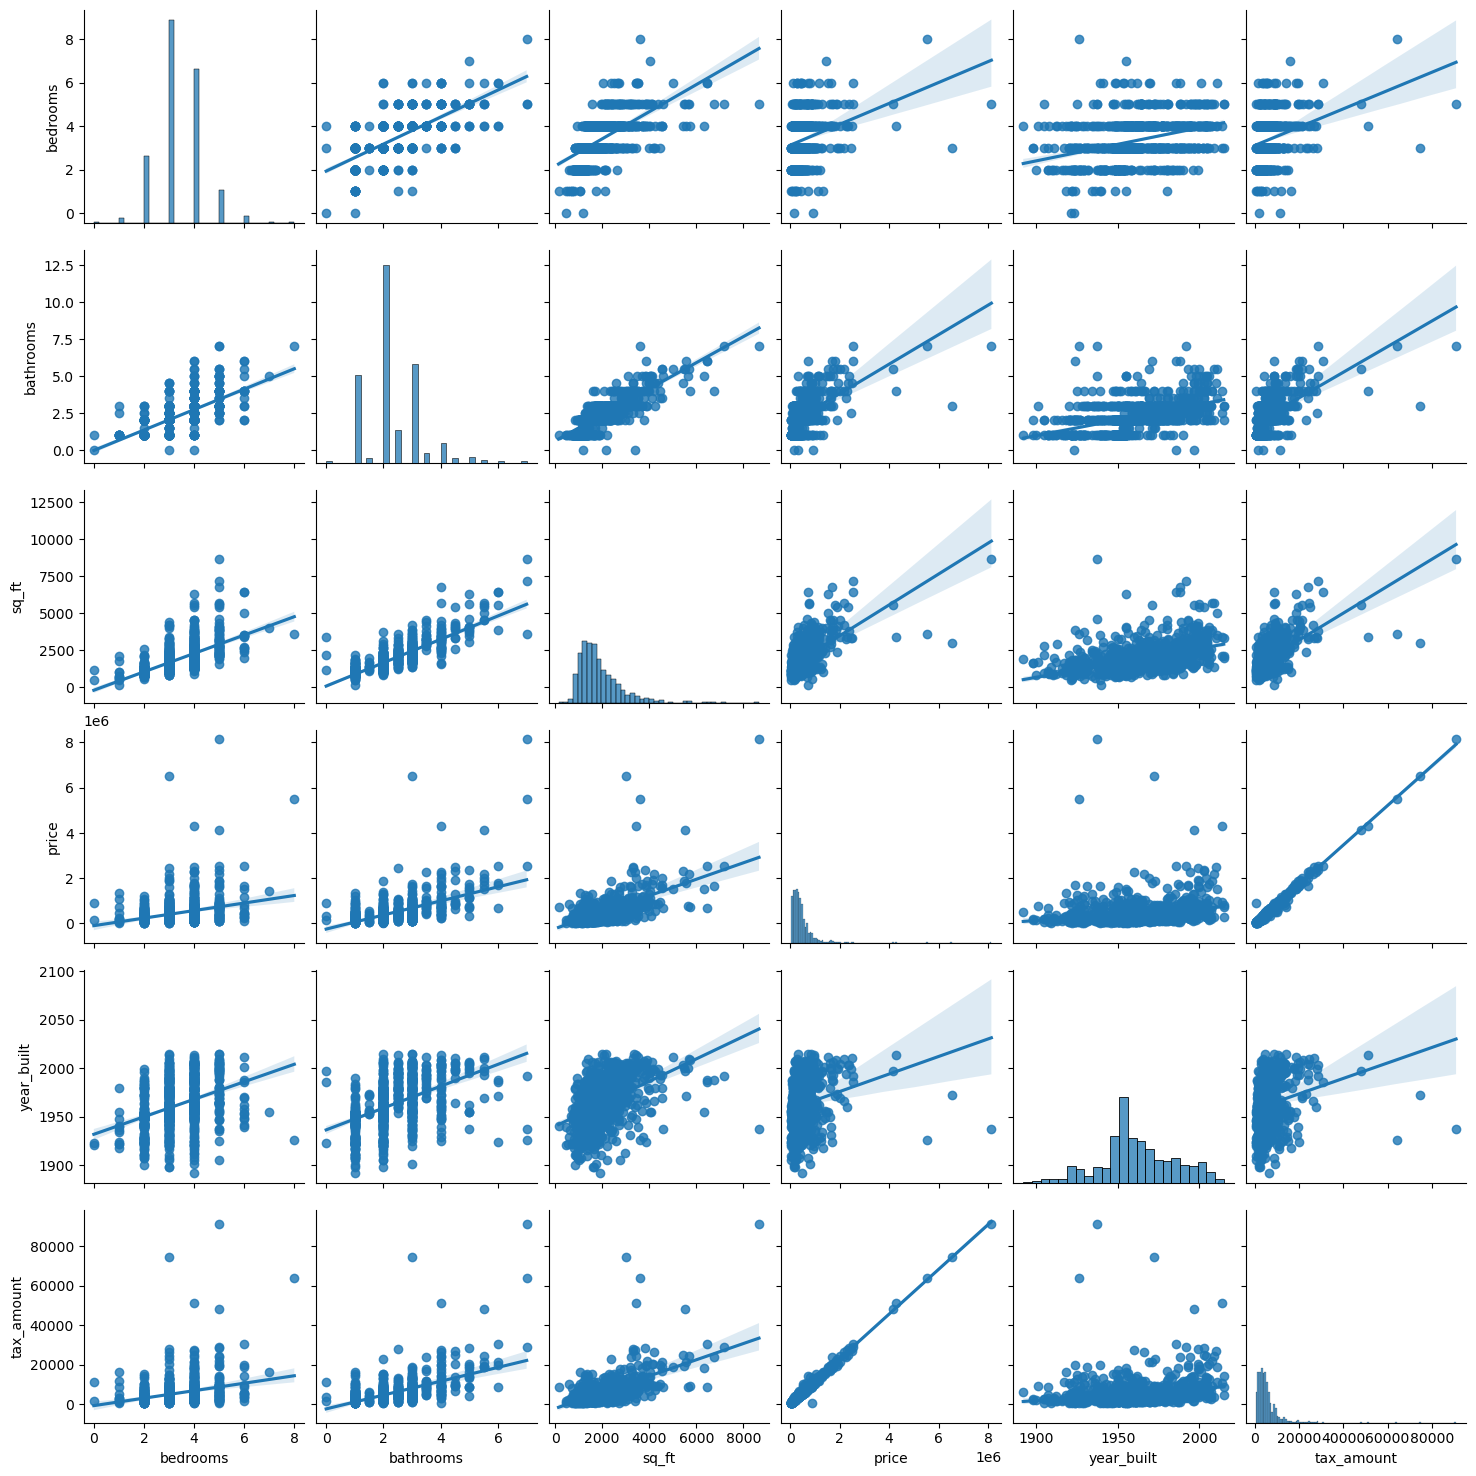

In [28]:
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(1000), kind='reg')
    
plot_variable_pairs(train)

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [29]:
def plot_categorical_and_continuous_vars(df, continuous=[], categorical=[], type='bar'):
    if type == 'bar':
        for cont in continuous:
            for cat in categorical:
                plt.figure(figsize=(12,8))
                sns.barplot(data=df, x=cat, y=cont)
    if type == 'box':
        for cont in continuous:
            for cat in categorical:
                plt.figure(figsize=(12,8))
                sns.boxplot(data=df, x=cat, y=cont)

In [30]:
zil.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'price', 'year_built', 'tax_amount',
       'fips'],
      dtype='object')

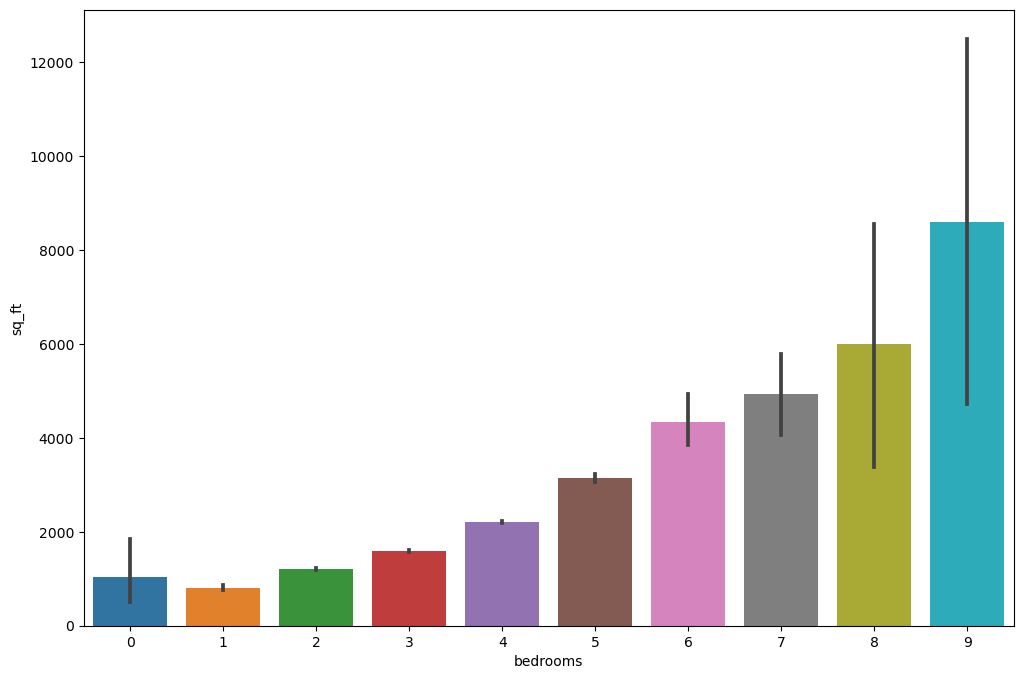

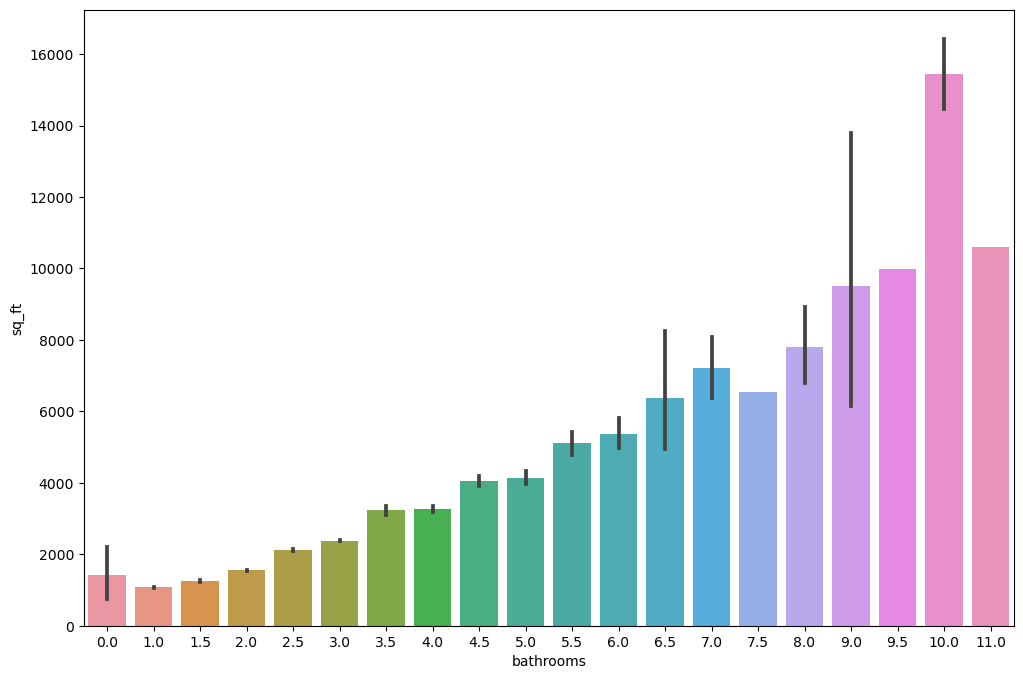

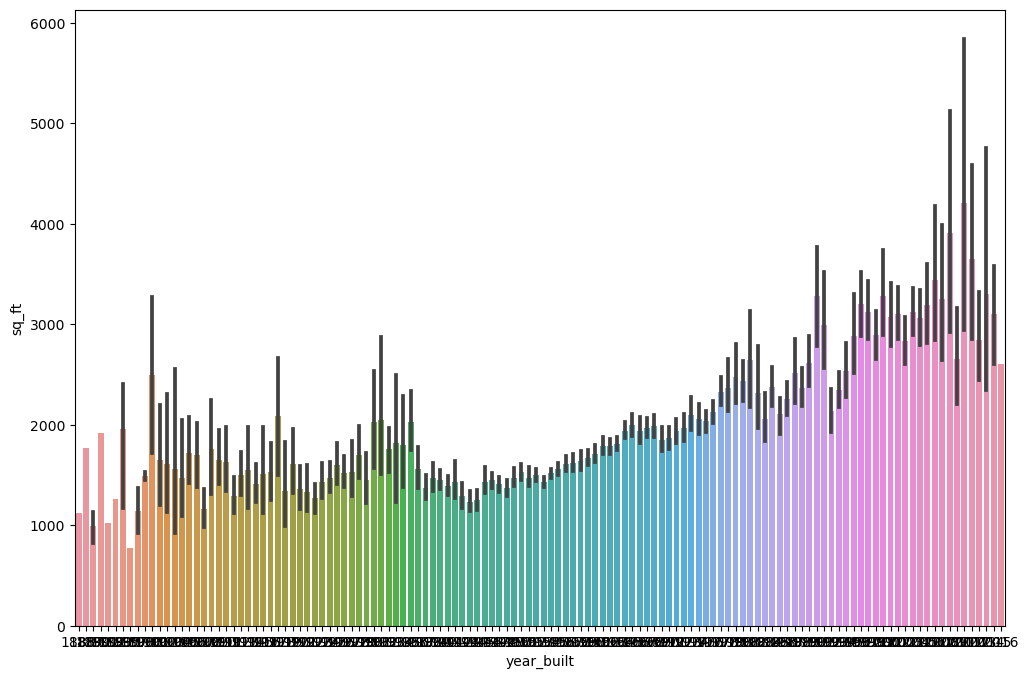

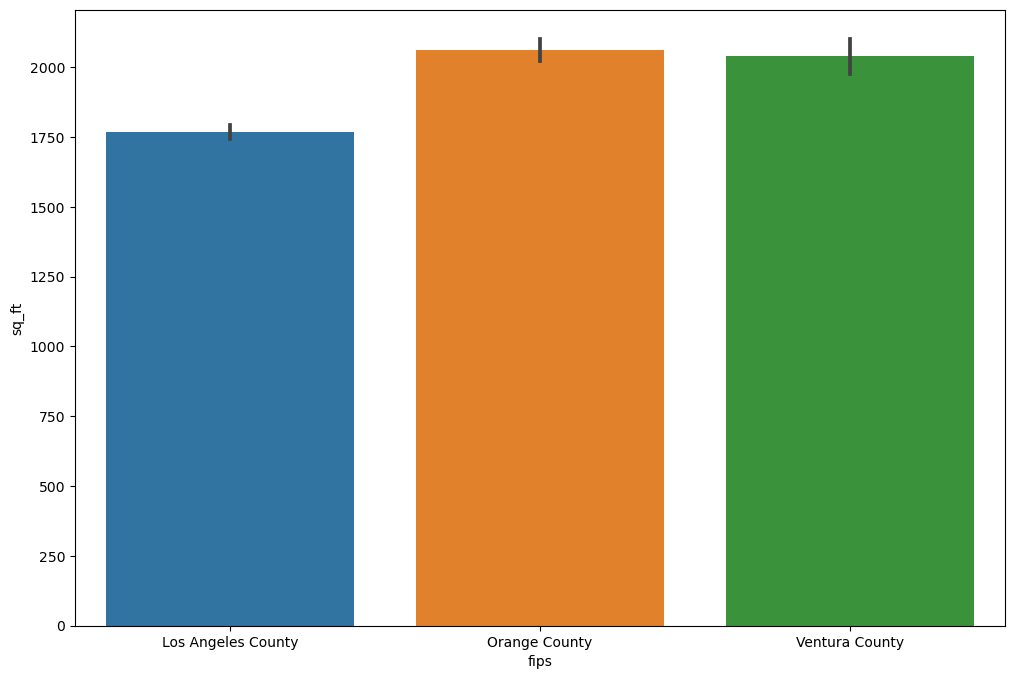

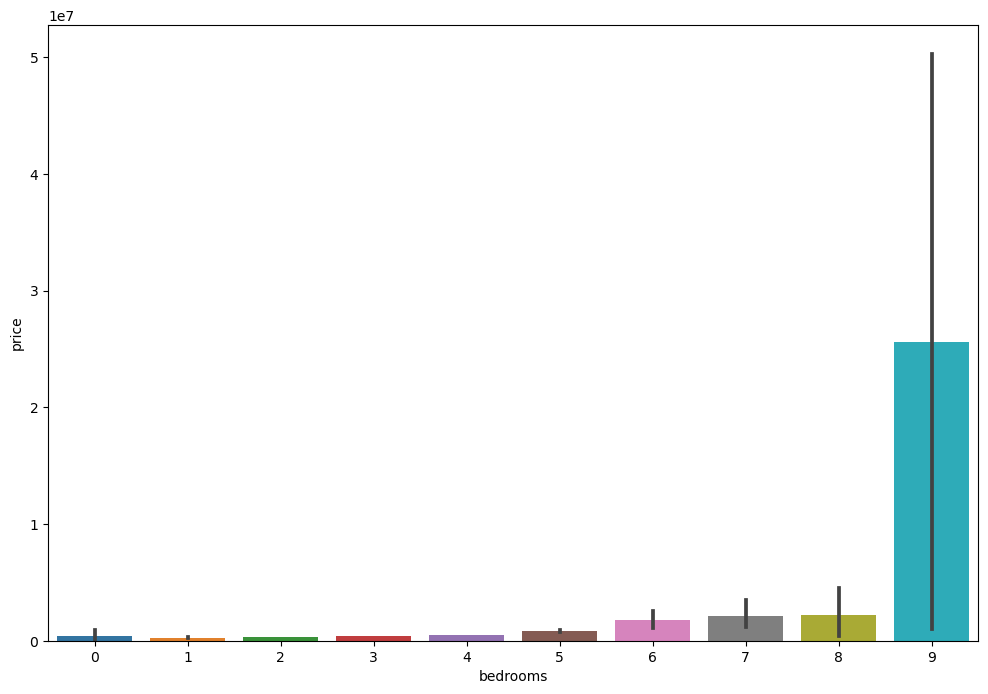

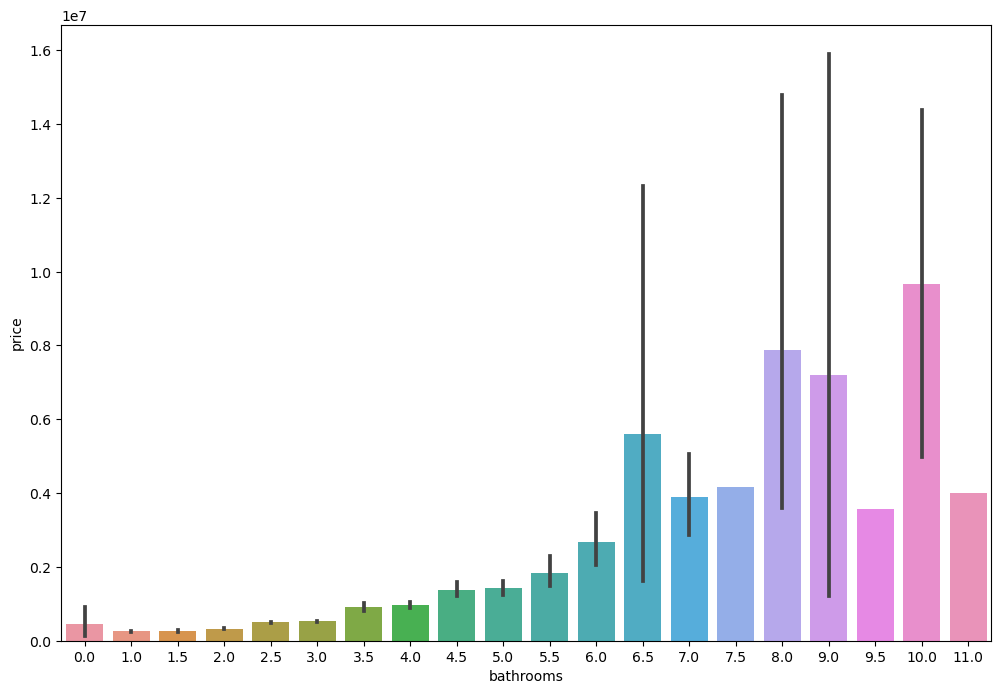

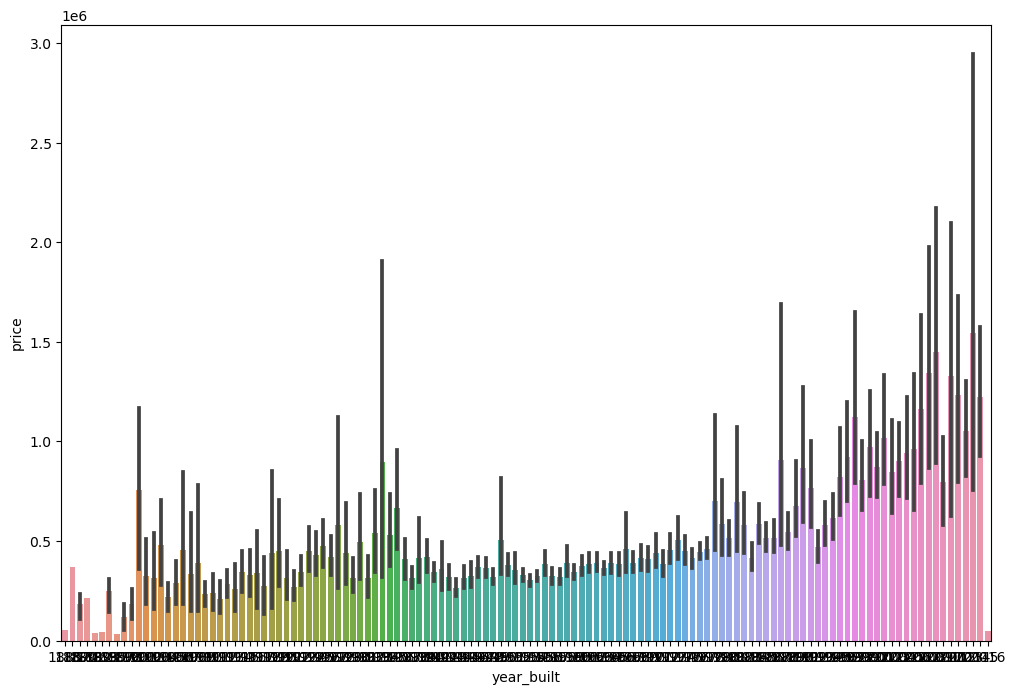

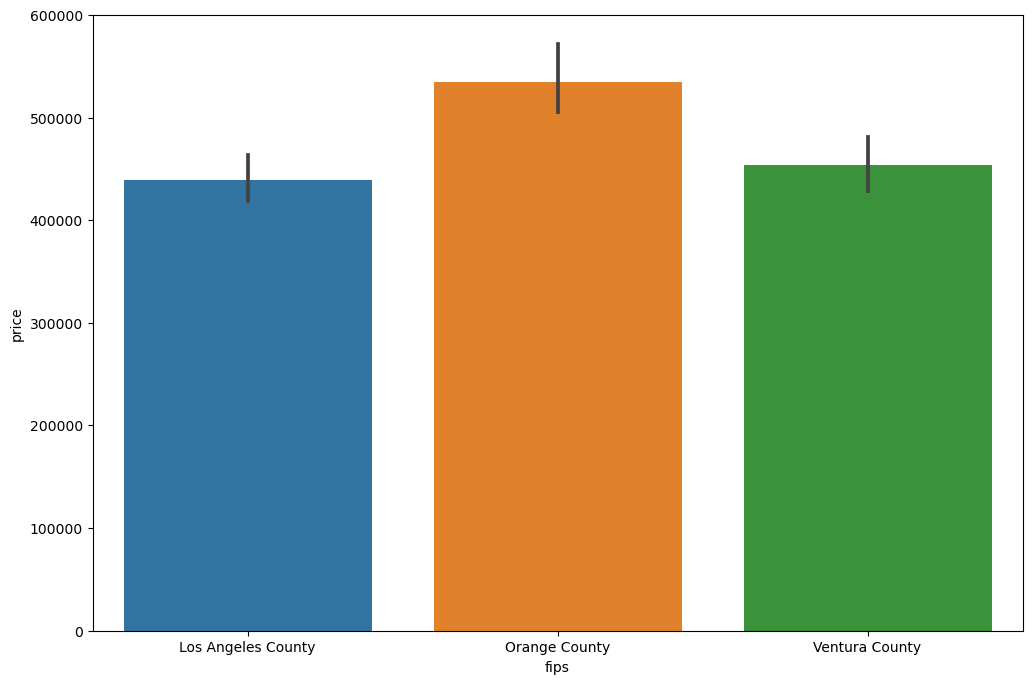

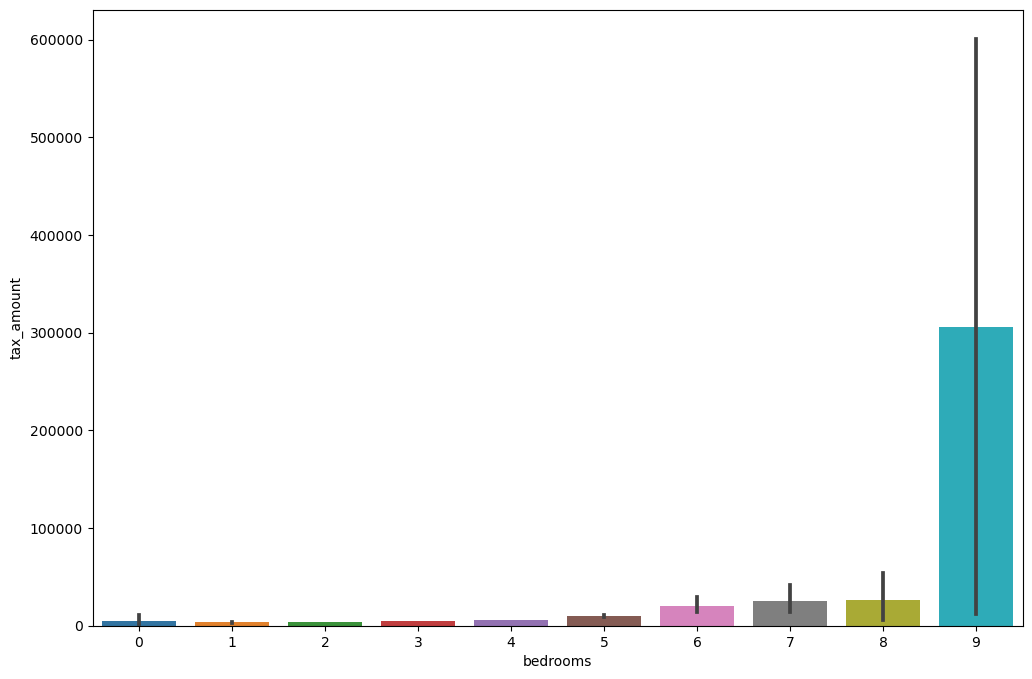

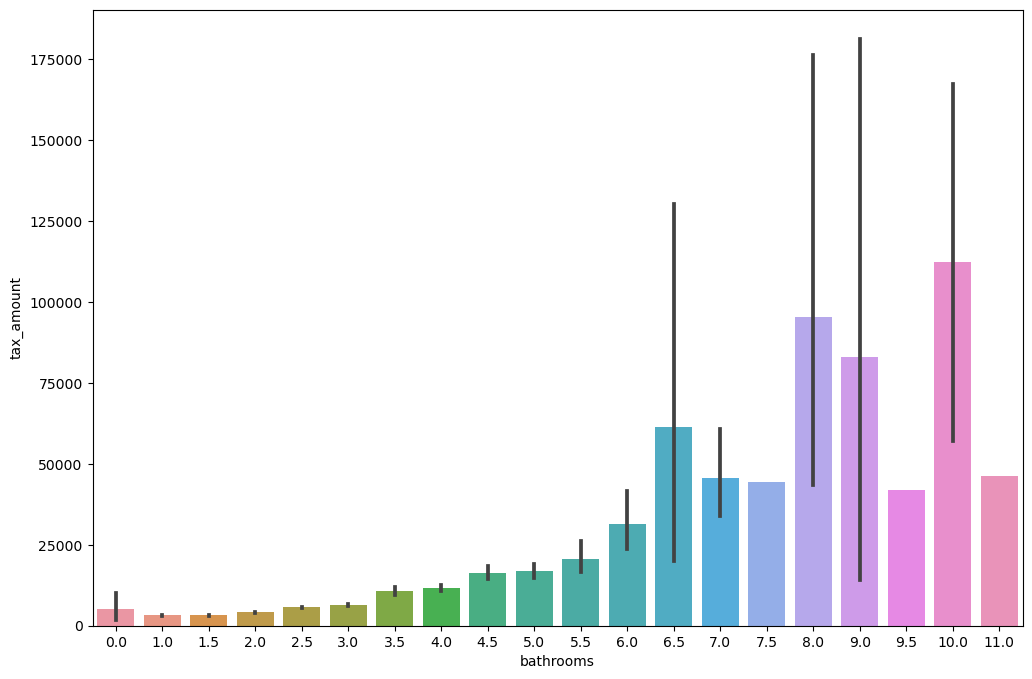

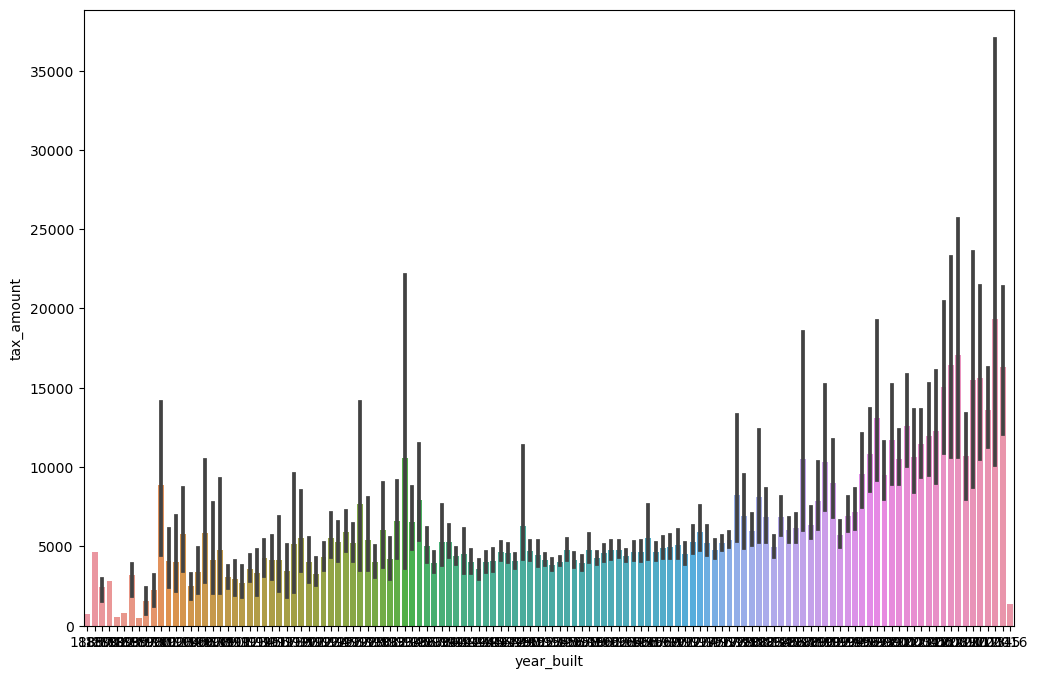

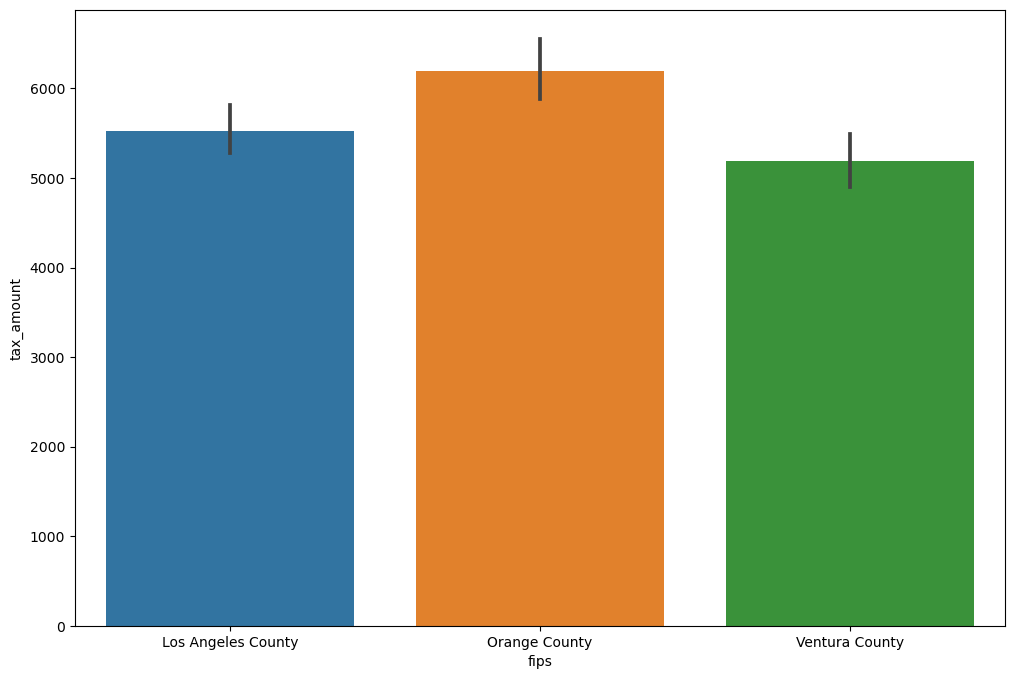

In [31]:
plot_categorical_and_continuous_vars(train.sample(10000), ['sq_ft', 'price', 'tax_amount'], ['bedrooms', 'bathrooms','year_built', 'fips'])

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [32]:
# Done in wrangle.py

#from wrangle import plot_categorical_and_continuous_vars, plot_variable_pairs

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

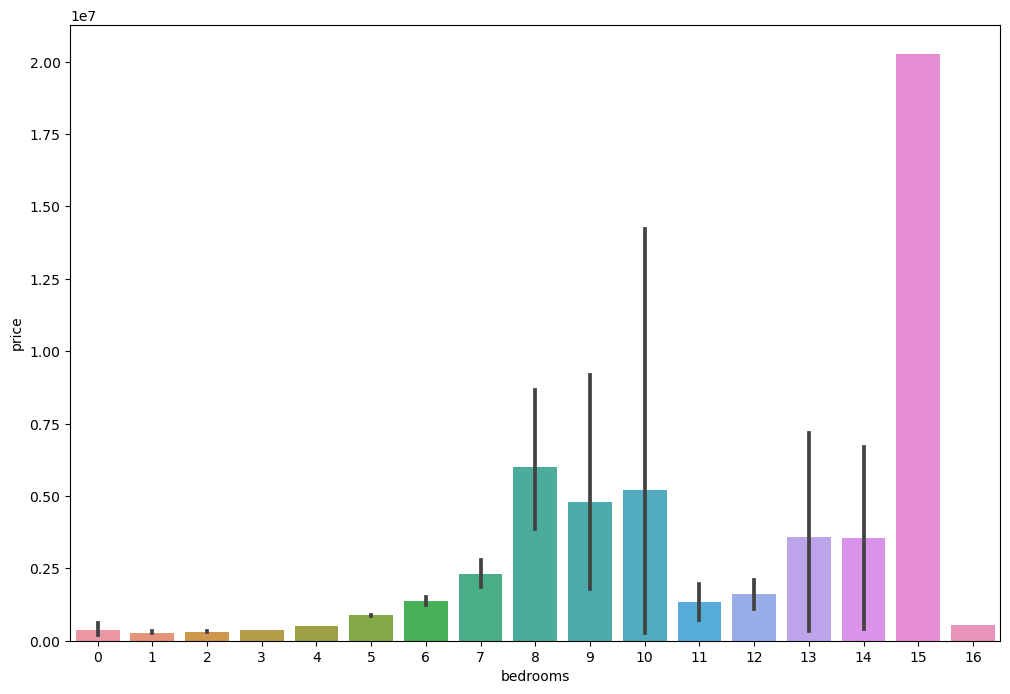

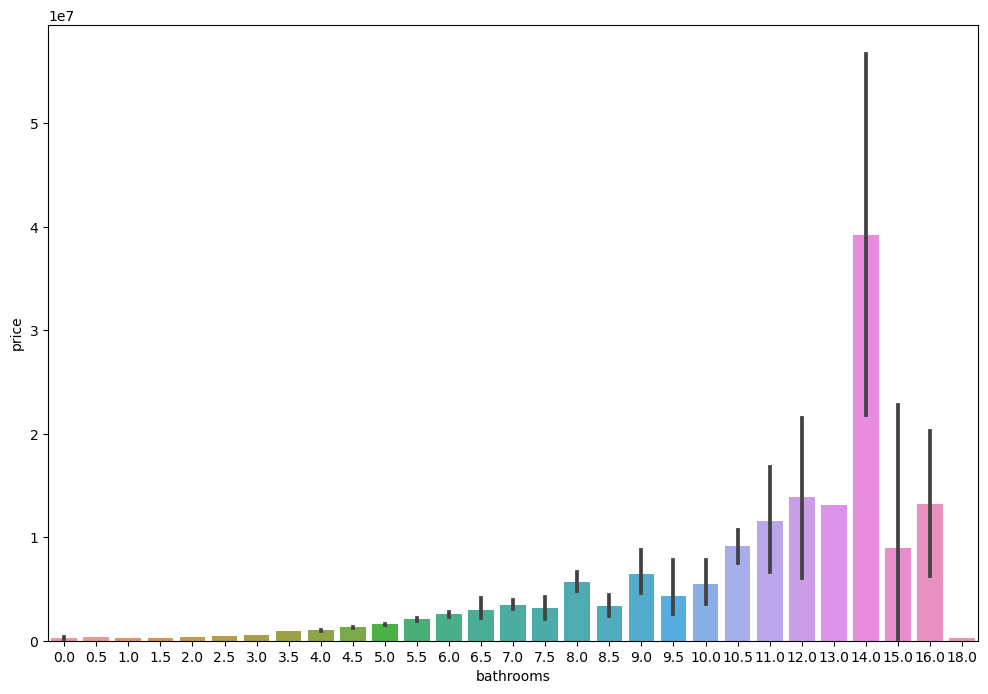

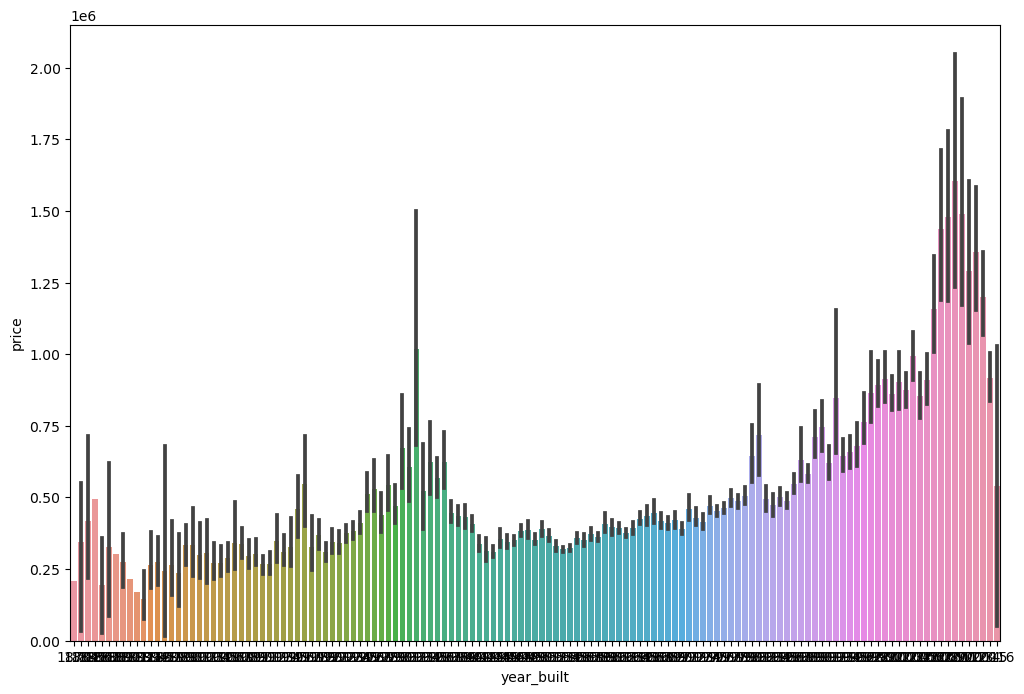

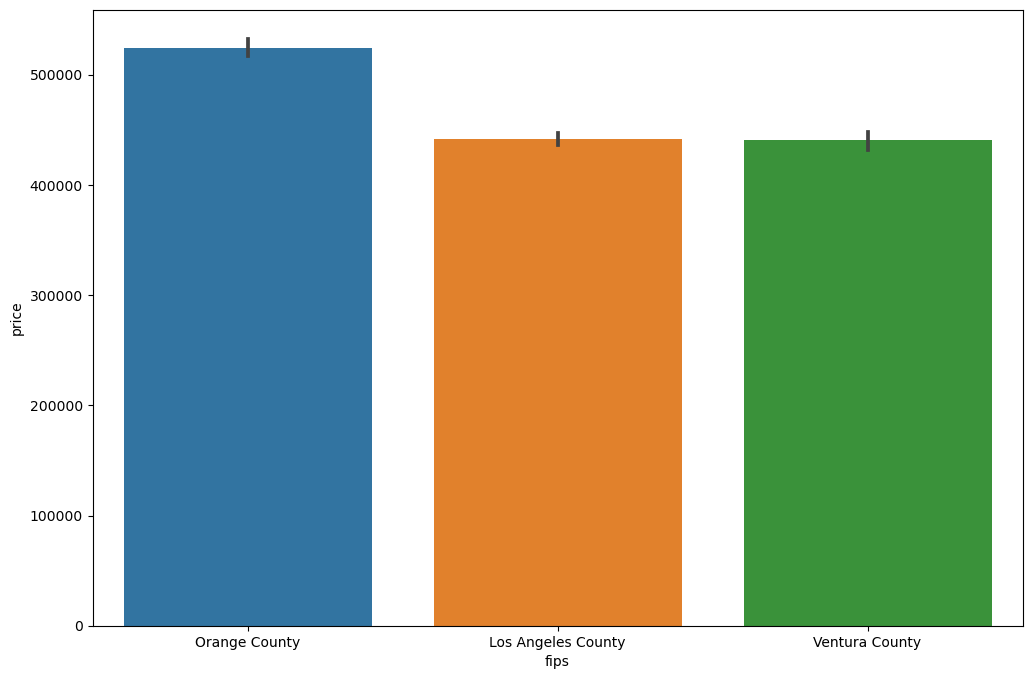

In [33]:
plot_categorical_and_continuous_vars(train.sample(100000), ['price'], ['bedrooms', 'bathrooms','year_built', 'fips'])

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

In [34]:
# The number of sq ft in a house has a positivive relation with the price of the house.

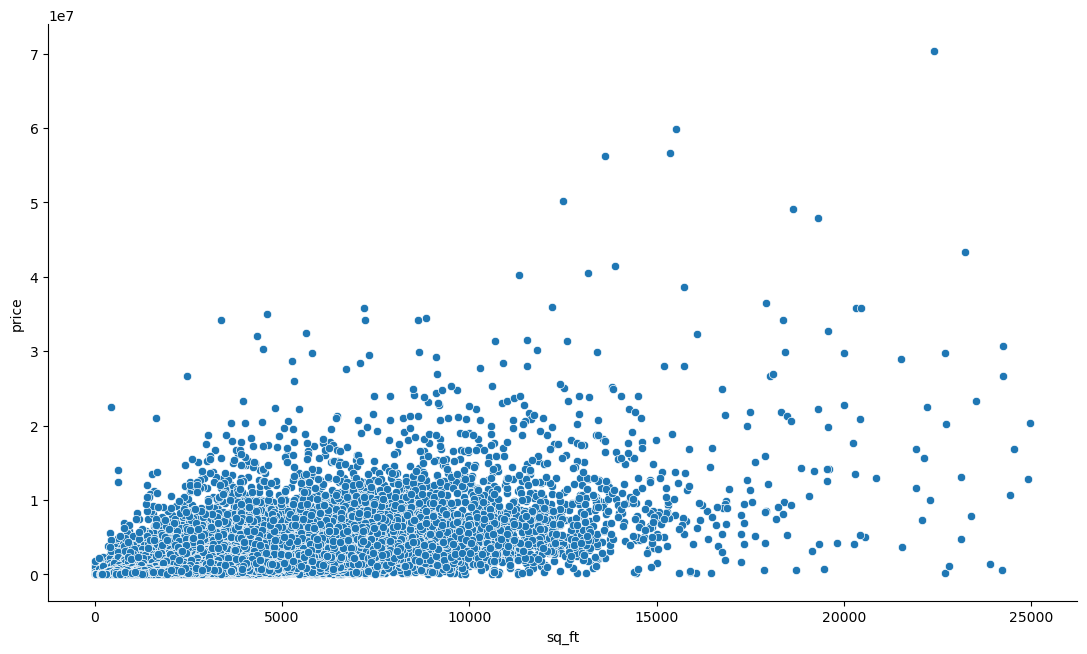

In [89]:
g = sns.relplot(data=train[train.sq_ft<25_000], x='sq_ft', y='price')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)
plt.show()

Sq ft seems to have a positive correlation with  price but not a very strong one. There are lots of houses with big square footage but similar prices to those with smaller square footage

## 8. Visualize all combinations of variables in some way.

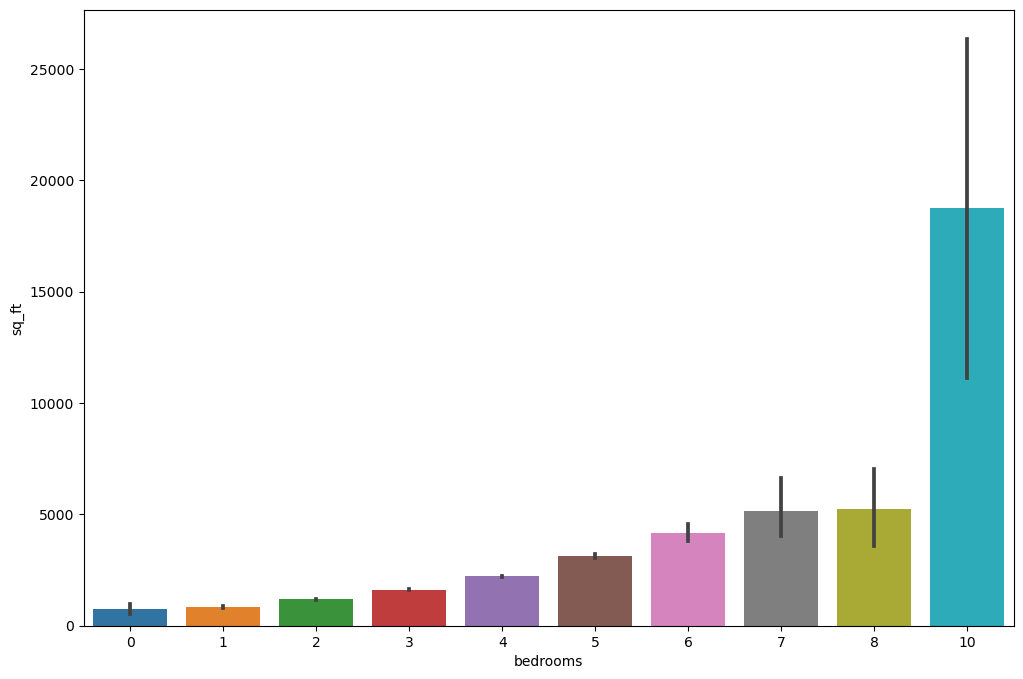

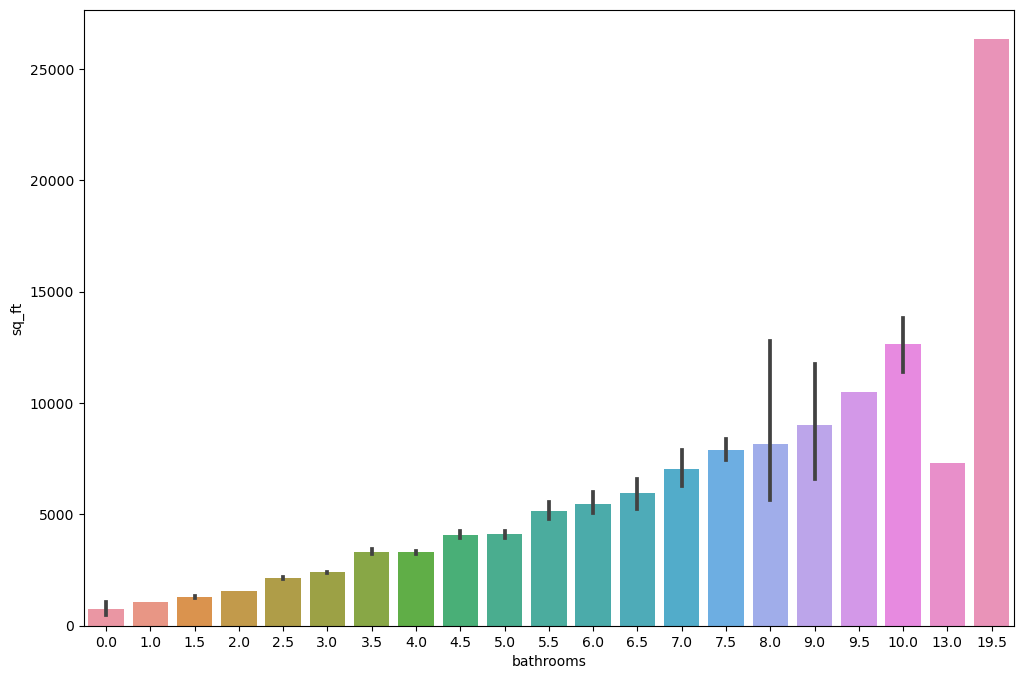

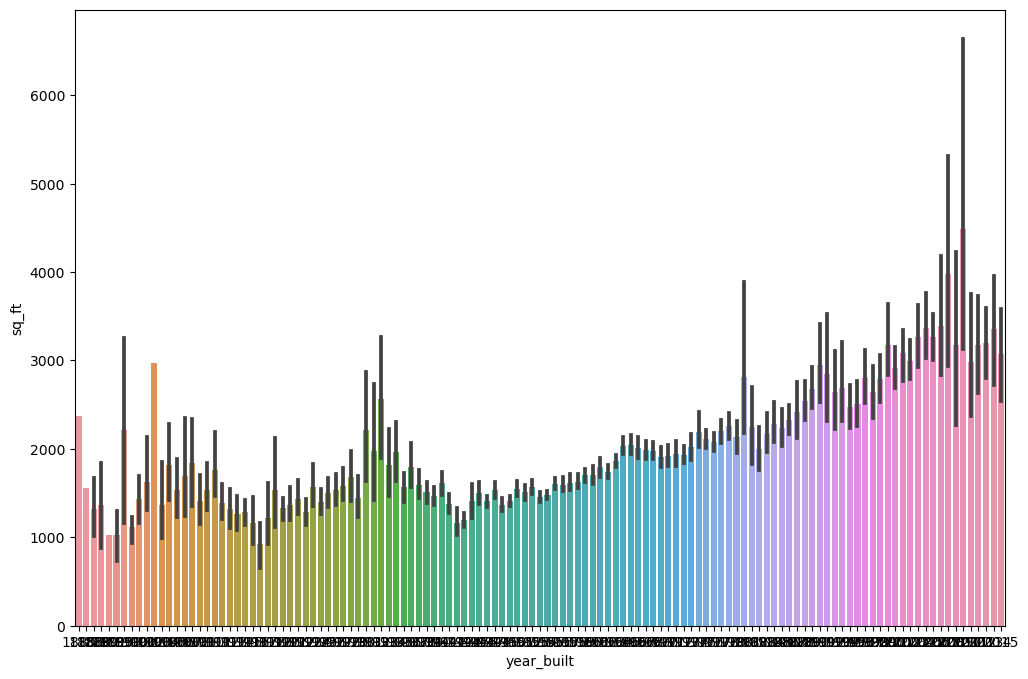

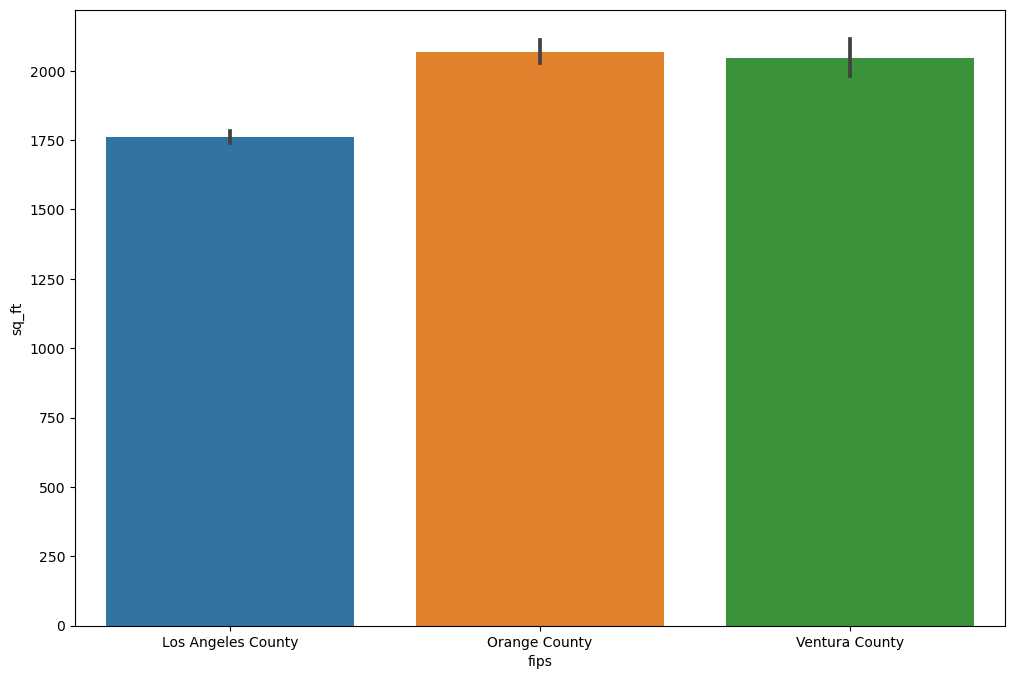

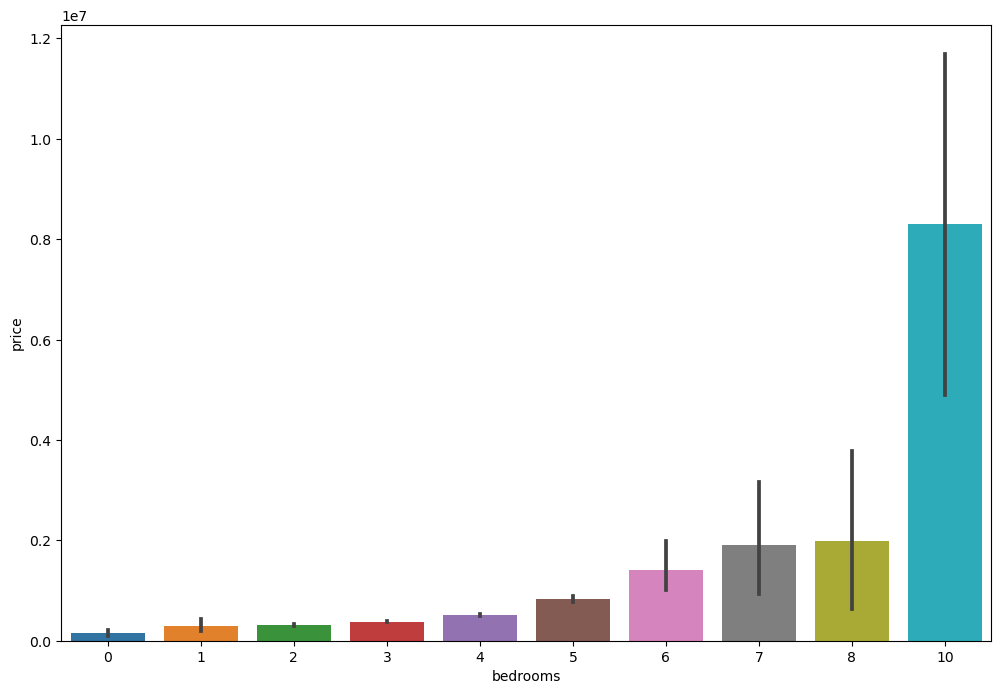

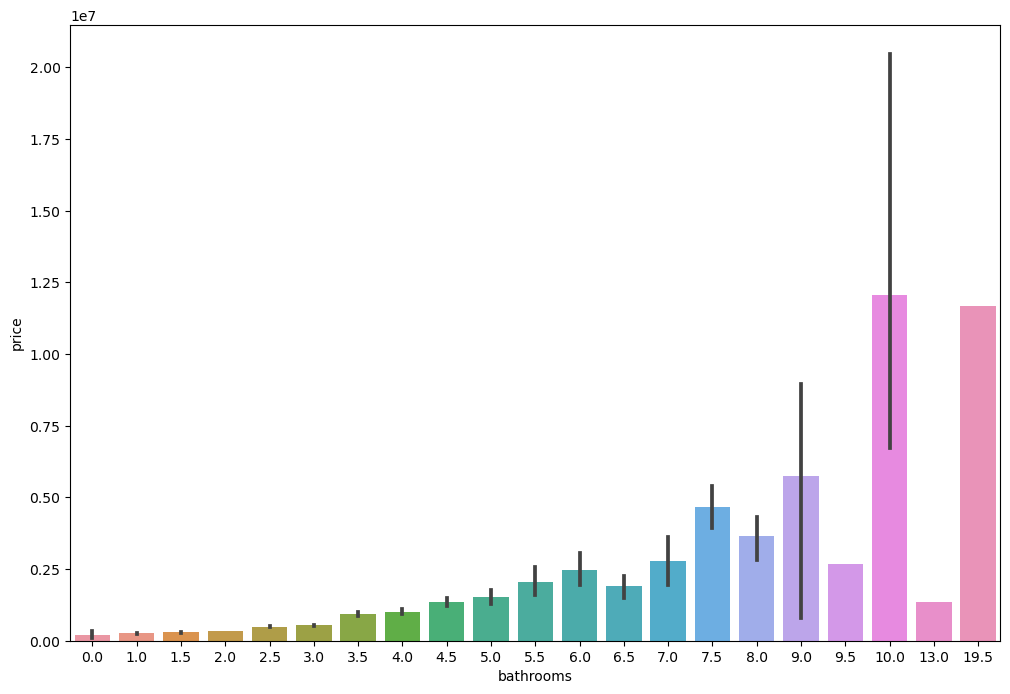

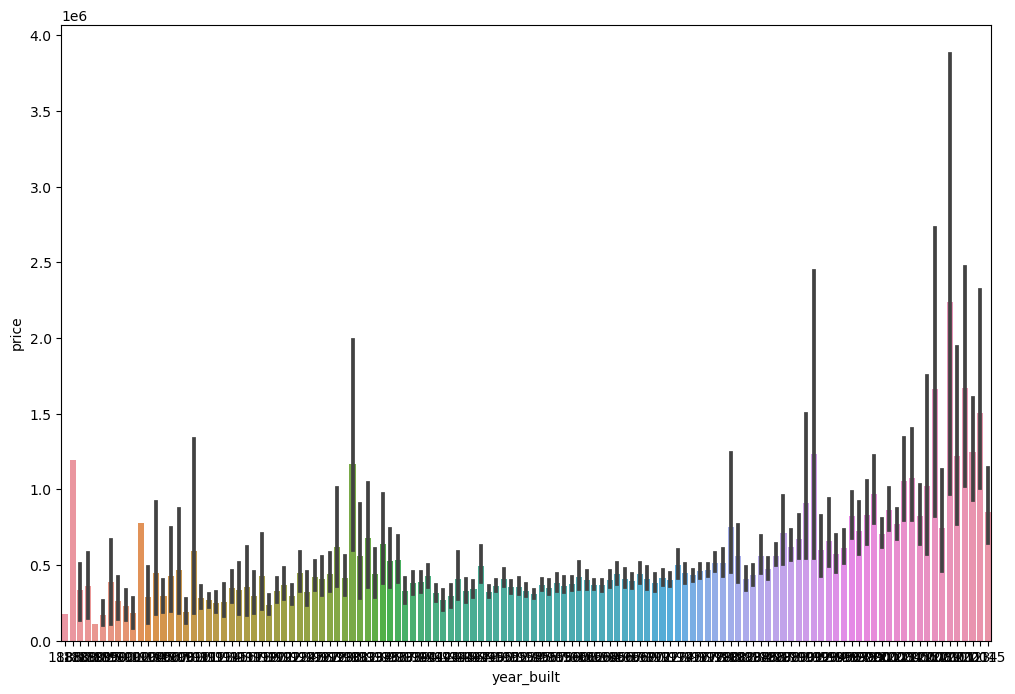

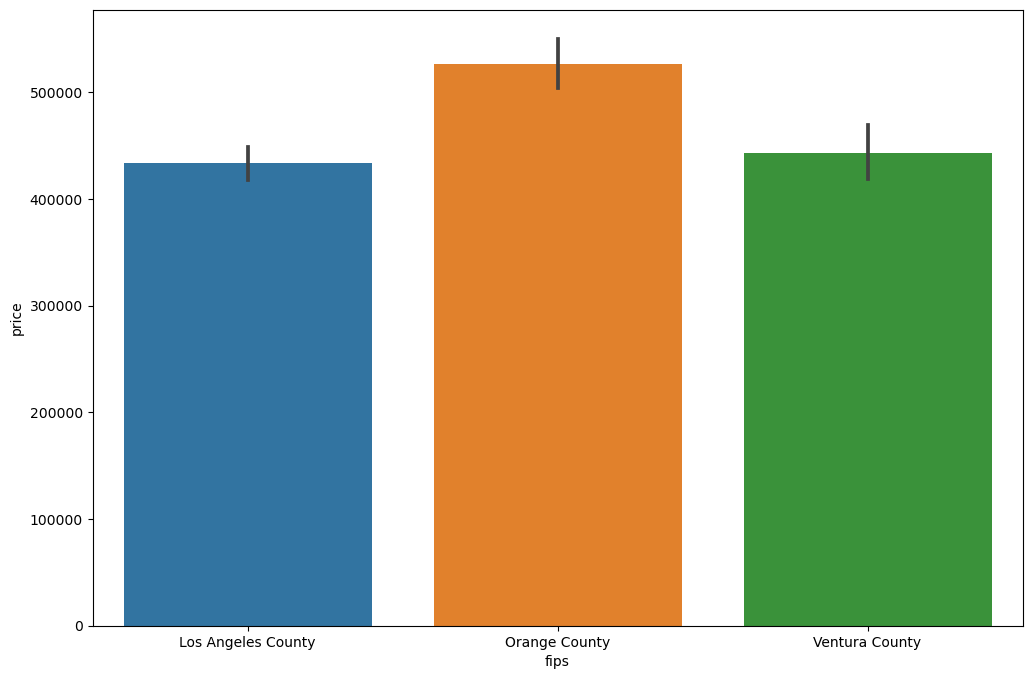

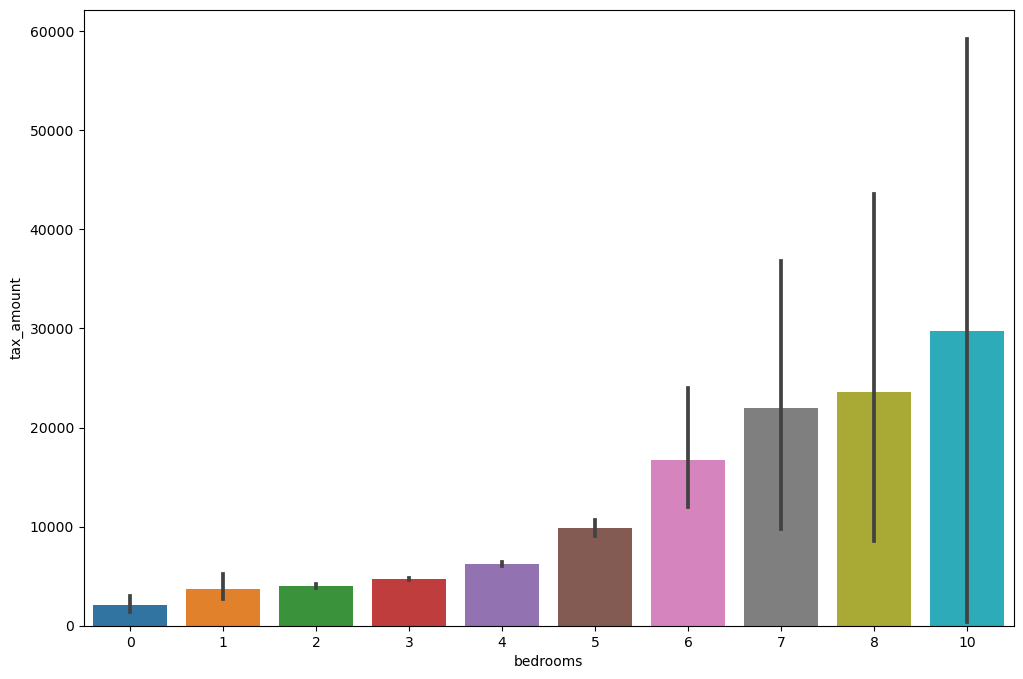

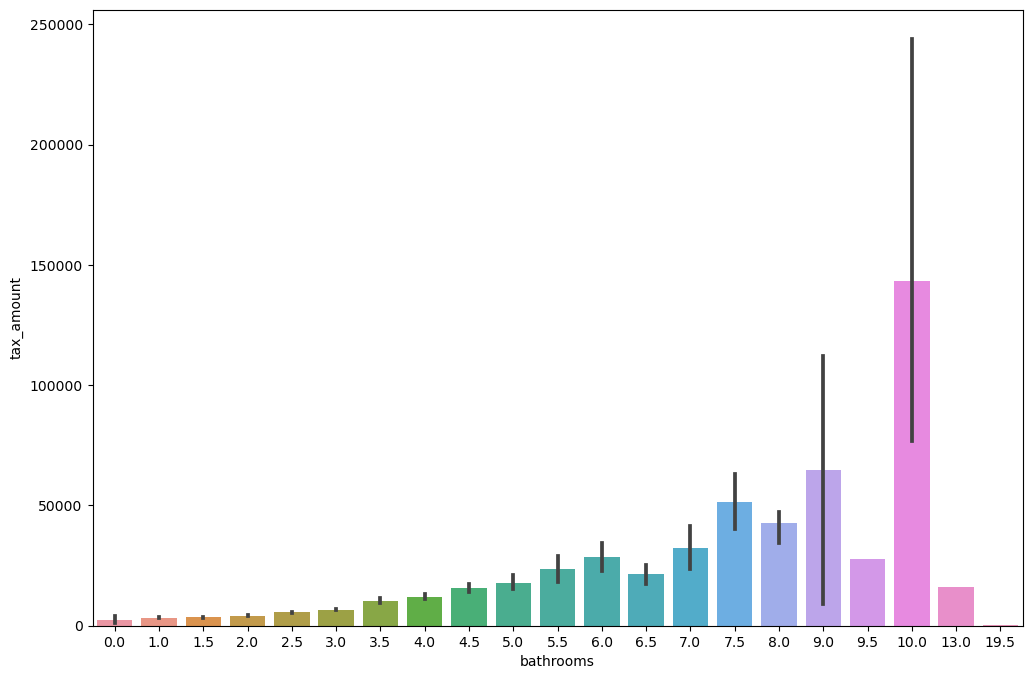

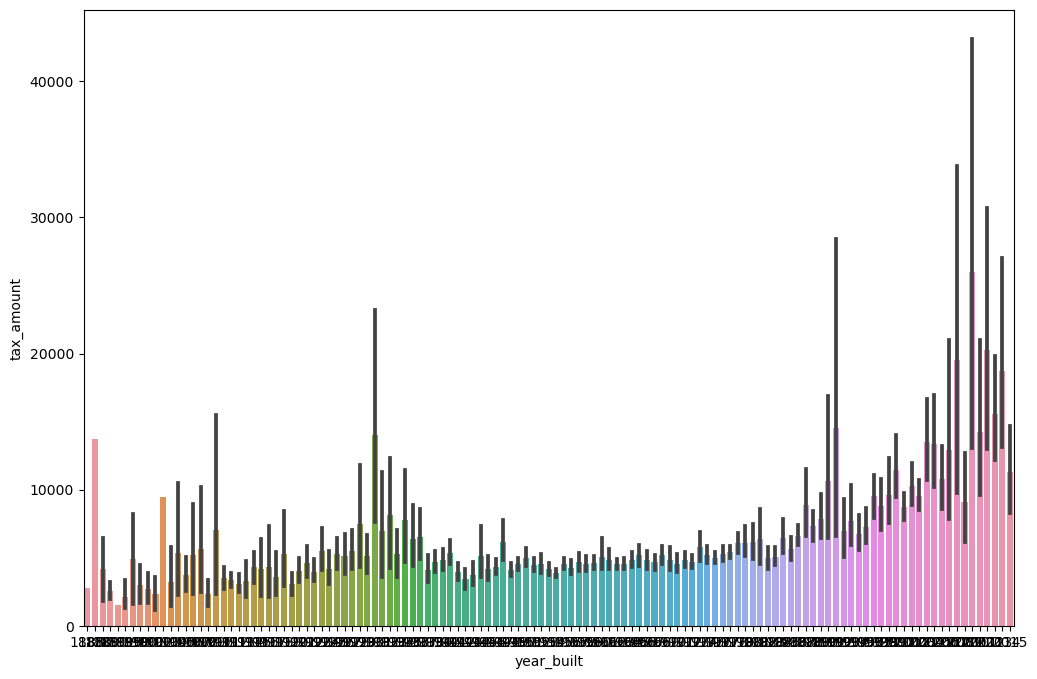

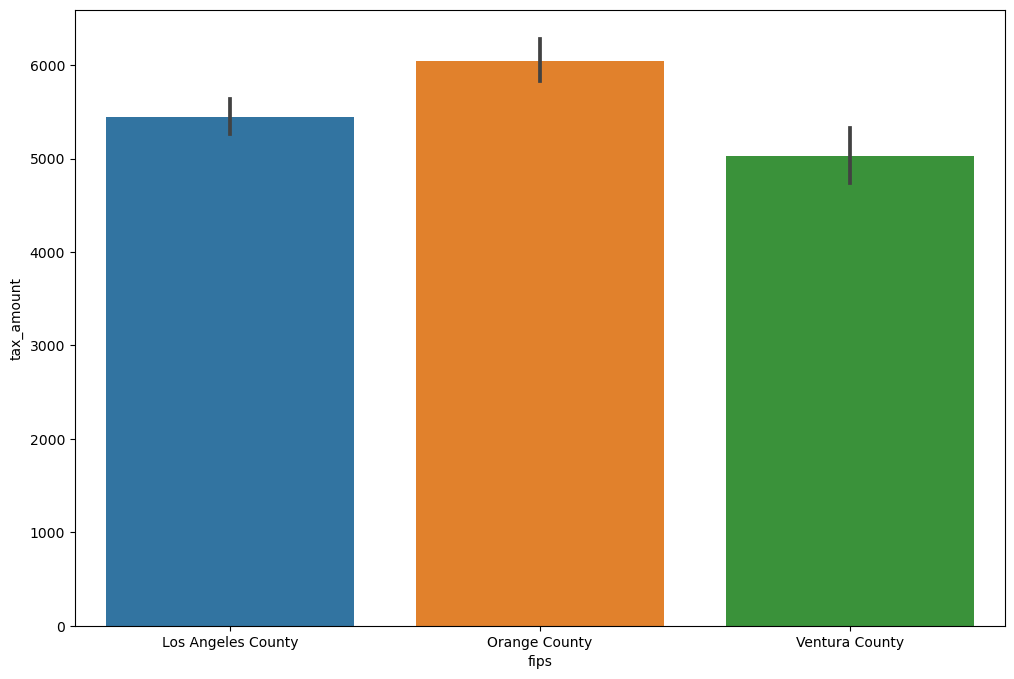

In [36]:
plot_categorical_and_continuous_vars(train.sample(10000), ['sq_ft', 'price', 'tax_amount'], ['bedrooms', 'bathrooms','year_built', 'fips'])

## 9. Run the appropriate statistical tests where needed.

In [37]:
from scipy import stats
from pydataset import data

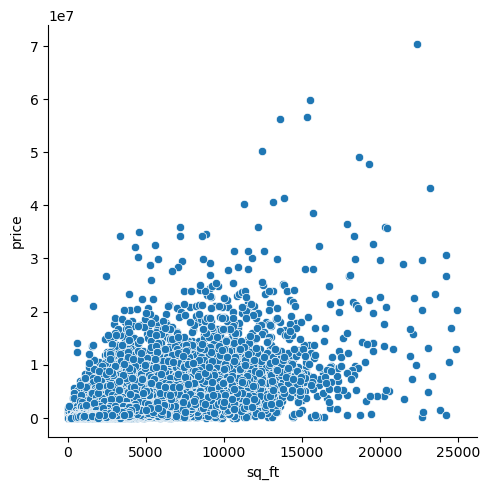

In [38]:
sns.relplot(data=train[train.sq_ft<25_000], x='sq_ft', y='price')
plt.show()

In [39]:
corr, p = stats.pearsonr(train.sq_ft, train.price)
corr, p

(0.45132768419260655, 0.0)

## 10. What independent variables are correlated with the dependent variable, home value?

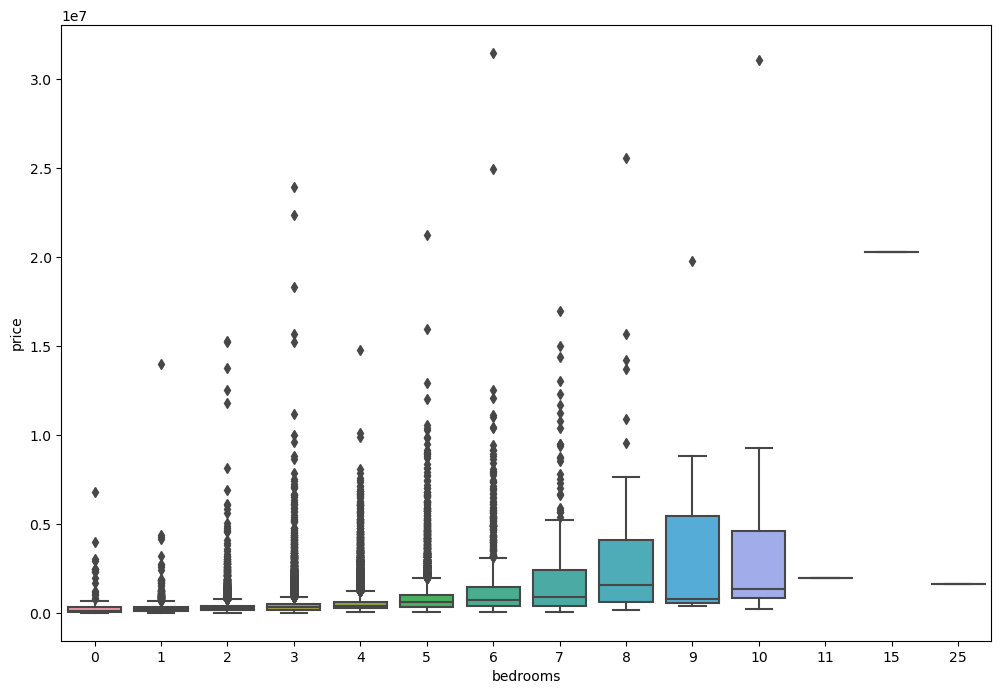

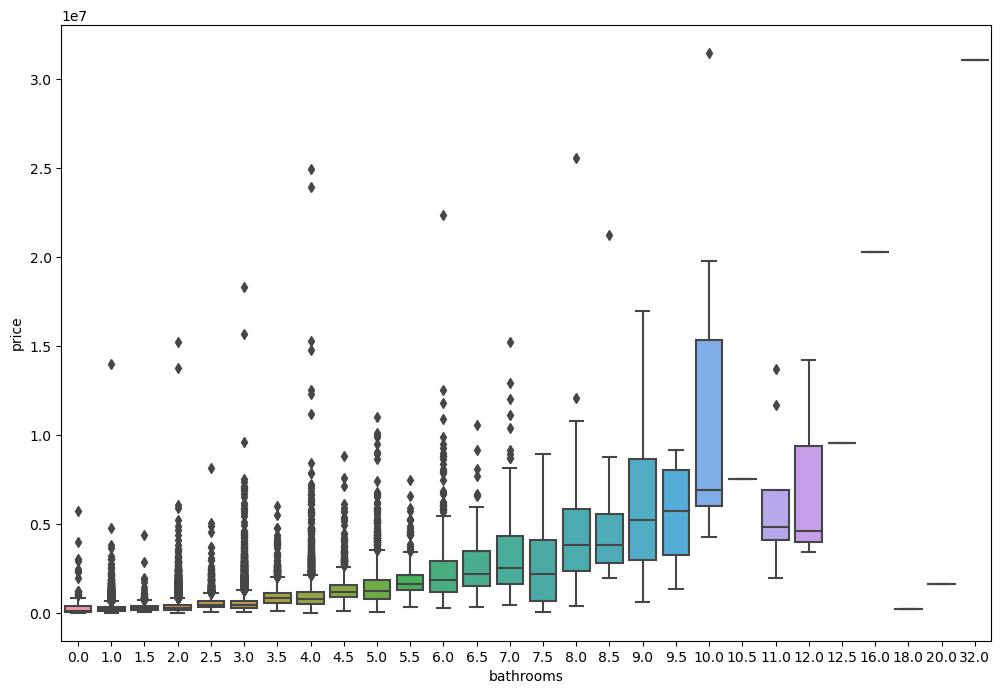

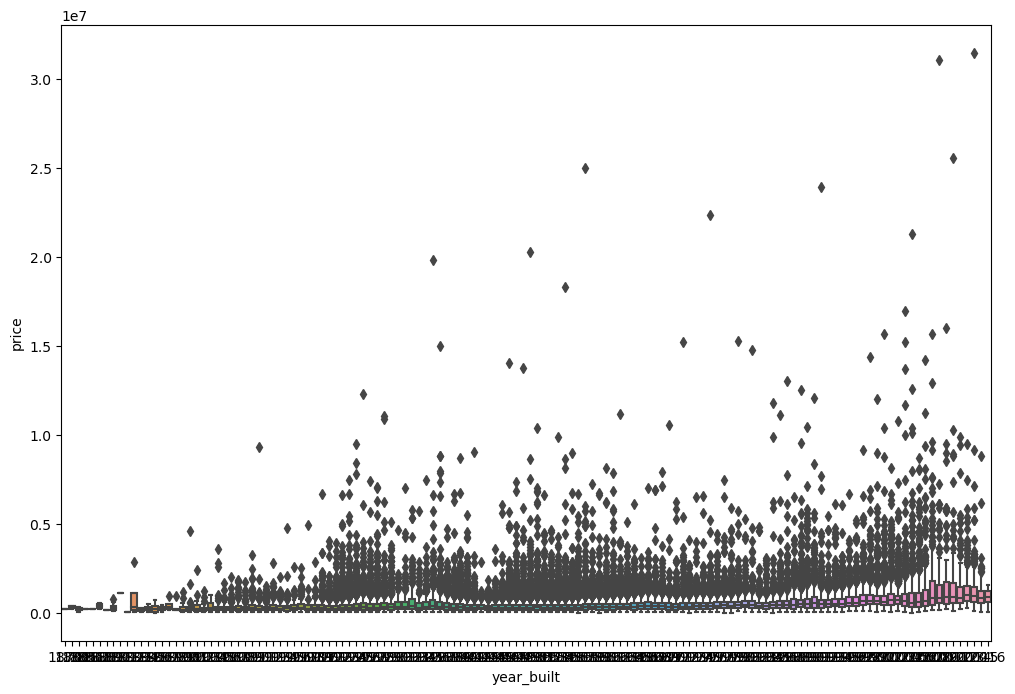

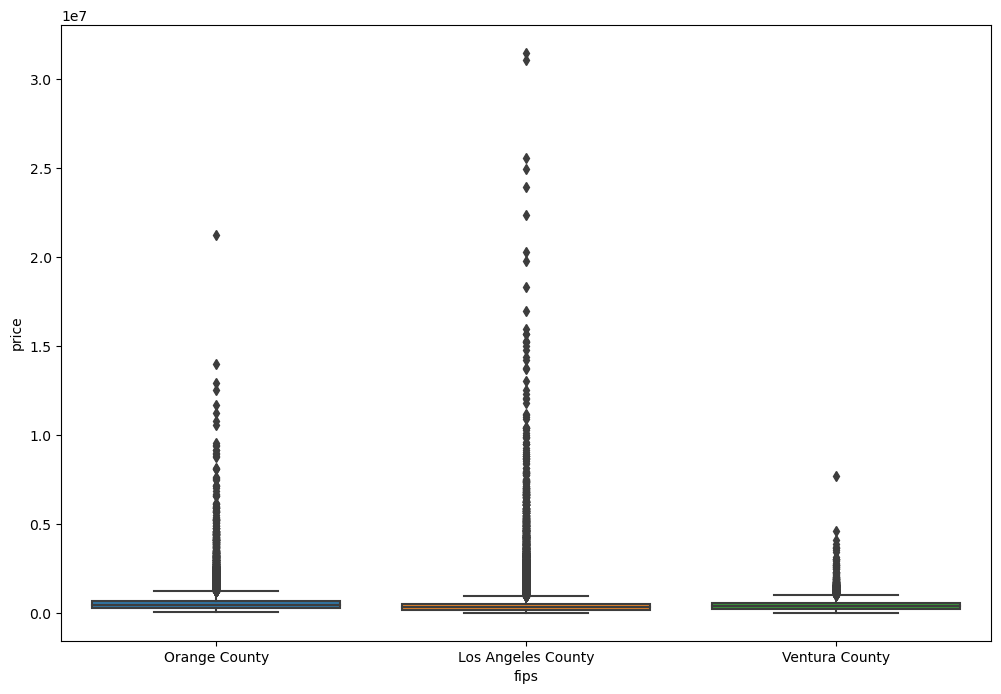

In [40]:
plot_categorical_and_continuous_vars(train.sample(100_000), ['price'], ['bedrooms', 'bathrooms','year_built', 'fips'],type='box')

In [41]:
for fip in train.fips.unique():
    county = train.price[train.fips == fip]
    print(f'{fip}    mean: ${round(county.mean(),2)}     median: ${round(county.median(),2)}')

Los Angeles County    mean: $437293.06     median: $295708.0
Orange County    mean: $525028.97     median: $405957.0
Ventura County    mean: $439149.91     median: $373116.0


It looks like orange county had the most expensive homes, ventura county had the second most expensive homes and LA county has the least expensive.

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

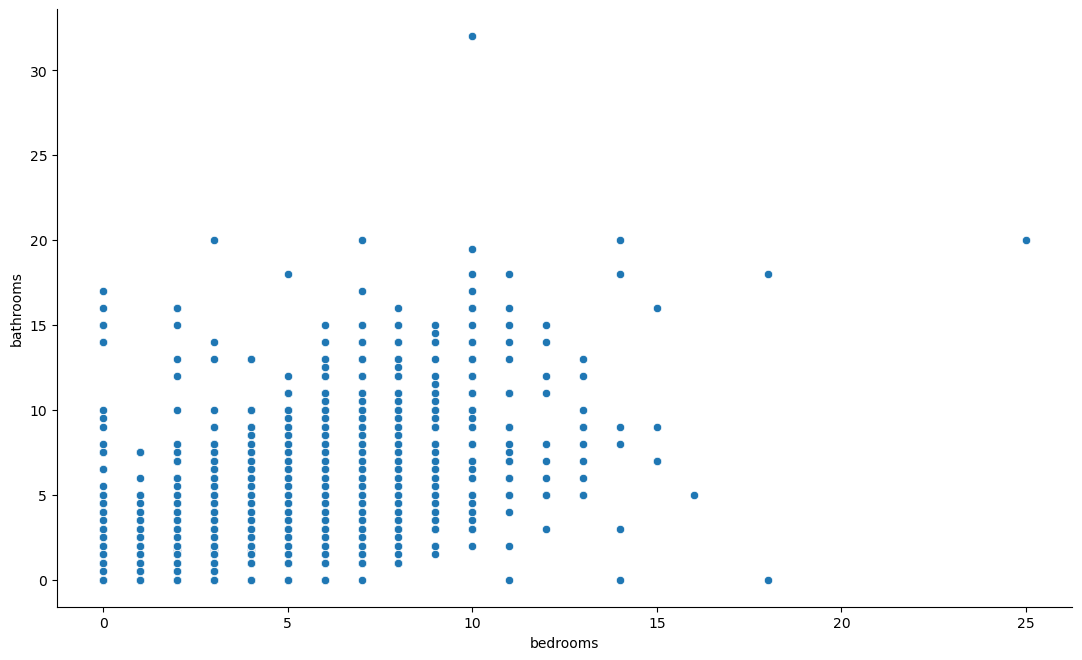

In [58]:
g = sns.relplot(data=train, x='bedrooms', y='bathrooms')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)
plt.show()

In [43]:
train.head(1)

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County


bedroom and bathroom seem to have a correlation with each other. They seem to go up with each other. as bathroom count increases so does bedroom.

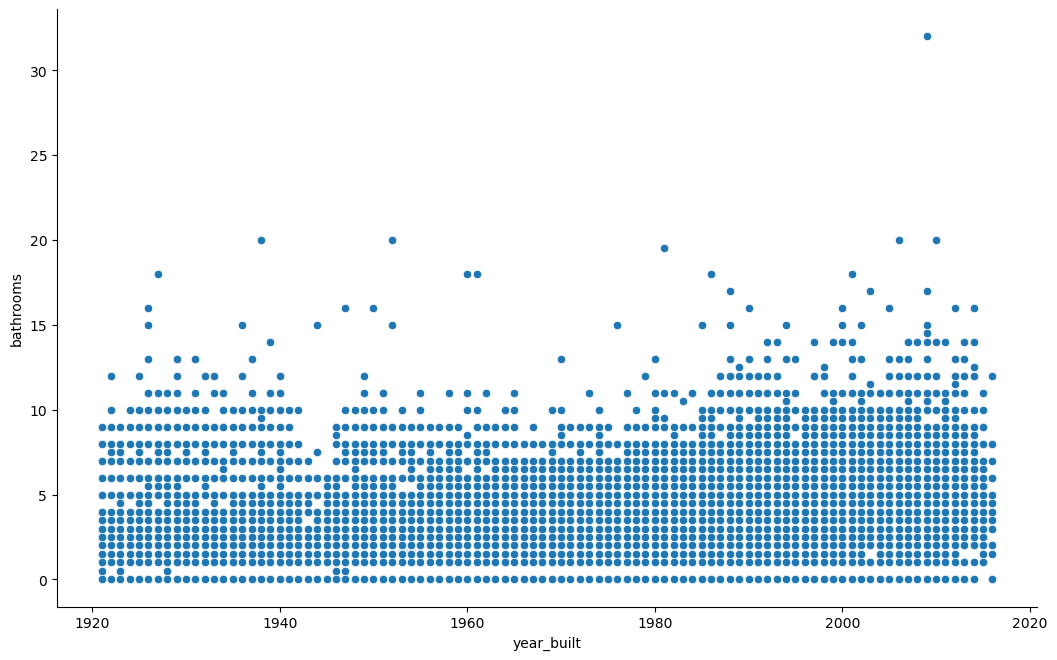

In [62]:
g = sns.relplot(data=train[train.year_built > 1920], x='year_built', y='bathrooms')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

In [59]:
corr, p = stats.pearsonr(train.year_built, train.price)
corr, p

(0.18997822685892274, 0.0)

In [60]:
corr, p = stats.pearsonr(train.bathrooms, train.price)
corr, p

(0.5033724217807889, 0.0)

In [61]:
corr, p = stats.pearsonr(train.bedrooms, train.price)
corr, p

(0.2577428124665564, 0.0)

In [82]:
train_house.house_size.value_counts()

medium    299894
tiny      299814
small     299586
huge      299555
big       299315
Name: house_size, dtype: int64

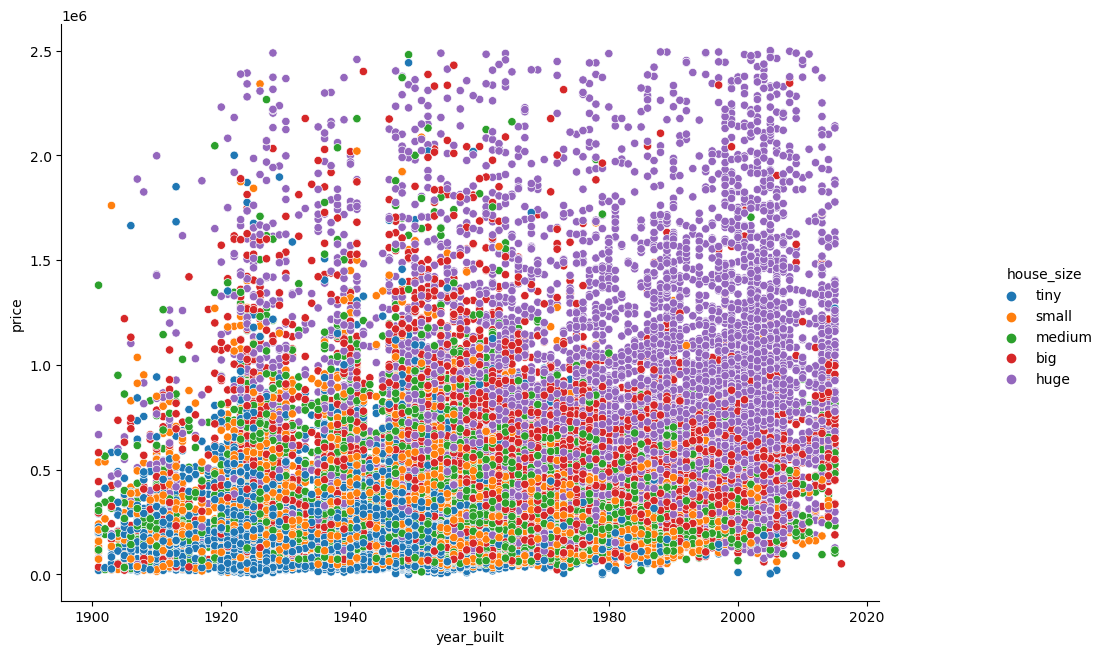

In [93]:
train_hous = train_house[train_house.year_built > 1900]
g = sns.relplot(data=train_hous[train_hous.price<2_500_000].sample(50_000), x='year_built', y='price', hue='house_size')
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

In [81]:
train_house = train.copy()
train_house['house_size'] = pd.qcut(train.sq_ft,5,labels=['tiny','small','medium','big','huge'])

It looks like there is a slight correlation with year built and house prices. Newer houses are generally worth more.

In [84]:
train.price.mean()

460080.7179694613

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [63]:
train.head()

,bedrooms,bathrooms,sq_ft,price,year_built,tax_amount,fips
1816338,4,3.0,2131.0,350540.0,1977,4719.83,Los Angeles County
1770176,3,3.0,2084.0,425101.0,1953,6397.19,Los Angeles County
1033606,4,3.0,2361.0,380546.0,2008,4815.34,Los Angeles County
2093580,5,3.0,2289.0,293831.0,1969,3559.74,Los Angeles County
1677414,5,3.0,2901.0,470040.0,1994,5509.28,Orange County


## 13. Explore your dataset with any other visualizations you think will be helpful.